<b><font size=10, color='#4ba3b4'> Python ARM Radar Toolkit -- Py-ART

Giselle Martinez</br>
Nov. 28, 2022</br>
AOS573

## Background

Today we will learn about the Python ARM Radar Toolkit, or Py-ART for short. This module was designed to contain weather radar algorithms and other utilities, 
(one of which is their RadarDisplay function that we'll use later). This module is used by the [Atmospheric Radiation Measurement (ARM) Climate Research Facility](https://www.arm.gov/), and where satellite data is currently retrieved from. 

More information about ARM is located below, most of today's lecture is also retrieved from the AMS Short Course on Source Radar Software.

#### References
[AMS Short Course on Open Source Radar Software](https://github.com/openradar/AMS-Short-Course-on-Open-Source-Radar-Software)</br>
[AMS/ASR Meeting Py-ART, the Python ARM Radar Toolkit](https://github.com/ANL-DIGR/notebooks/tree/master/ASR_PI_2015)</br>
[AMS/ASM Meeting, Py-ART Tutorial](https://github.com/ANL-DIGR/notebooks/tree/master/ASR_PI_2014)</br>
[NWS Area Radar](https://www.weather.gov/cle/Area_Radars)

#### Video References
[Python ARM Radar Toolkit Tutorial](https://www.youtube.com/watch?v=diiP-Q3bKZw&t=274s)</br>
[Plotting NEXRAD Data with Python](https://www.youtube.com/watch?v=f_y1pmodyIc&t=1s) <u> (Very helpful for this notebook as we'll be plotting NEXRAD Data with Py-ART.) </u>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

import pyart
from pyart.testing import get_test_data

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/aos573tutorials/share/proj failed
<frozen importlib._bootstrap>:283: DeprecationWarning: the load_module() method is deprecated and slated for removal in Python 3.12; use exec_module() instead



## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



## Reading in NEXRAD data

Py-ART can read in files in several formats, for the sake of time, we'll be using a NEXRAD data given by the Next Generation Weather Radar (NEXRAD) Data from Amazon Web Services, [NEXRAD Data](https://www.ncei.noaa.gov/access/metadata/landing-page/bin/iso?id=gov.noaa.ncdc:C00345) and if you are interested on gathering any data file, you can visit their [NEXRAD Data Archive](https://www.ncdc.noaa.gov/nexradinv/):

The following template of the data retrieved from [py-ART, reading NEXRAD data](https://arm-doe.github.io/pyart/examples/io/plot_nexrad_data_aws.html):
```bash
s3://noaa-nexrad-level2/year/month/date/station/{station}{year}{month}{date}_{hour}{minute}{second}_V06
```

Today we'll look at radar data from <b> Green Bay, WI, (KGRB) on November 15, 2022 at 1207 UTC.</b>

And use `pyart.io.read_nexrad_archive` to access the data:

In [2]:
data_KGRB = pyart.io.read_nexrad_archive('s3://noaa-nexrad-level2/2022/11/15/KGRB/KGRB20221115_120738_V06')
data_KGRB

In [3]:
# List of scans and fields needed to use Py-ART radar display 
list(data_KGRB.fields)

#or 
#data_KGRB.info('standard')

#Can see fields units, max and min values, etc.
#Also lists other variables the radar data has, (e.g altitude, azimuth, number of sweeps.)

['clutter_filter_power_removed',
 'reflectivity',
 'cross_correlation_ratio',
 'differential_phase',
 'velocity',
 'differential_reflectivity',
 'spectrum_width']

Using these fields, data can be plotted using Py-ART's [RadarMapDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.html) in the form of a radar.

* spectrum_width
* differential_phase
* reflectivity
* cross_correlation_ratio
* clutter_filter_power_removed
* differential_reflectivity
* velocity

To display NEXRAD radar data, we'll use `pyart.graph.RadarMapDisplay`, and set it as a variable:

In [4]:
display_KGRB = pyart.graph.RadarMapDisplay(data_KGRB)

## Plotting NEXRAD Data

Here we'll use [plot_ppi_map](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarMapDisplay.plot_ppi_map.html):

<b>We have to include the field</b>, (from above) also the <b>sweep number</b> to plot. That's where `data.info` comes in handy. 
We can locate how many number of sweeps the data has.

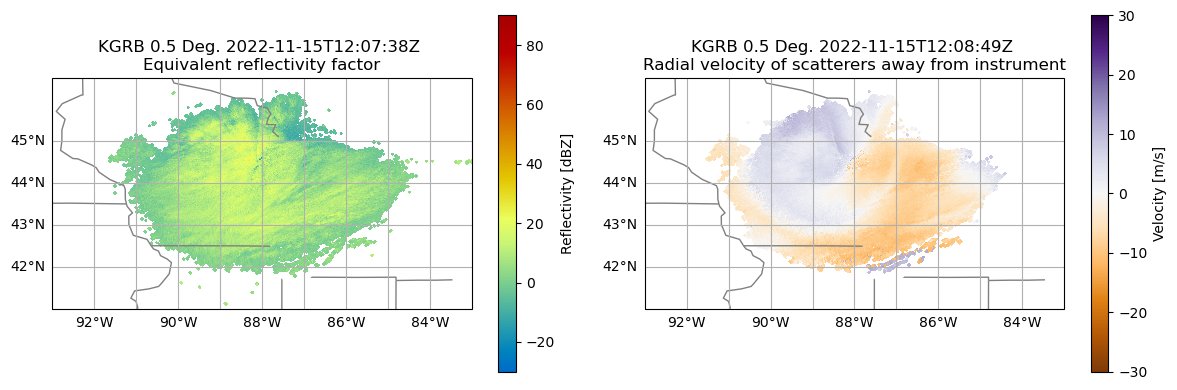

In [5]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(121, projection=ccrs.PlateCarree())

display_KGRB.plot_ppi_map('reflectivity', sweep=0, ax=ax, vmin=-30, vmax=90, #field, sweep,
                     min_lat=41, max_lat=46.5, min_lon=-83, max_lon=-93,
                     colorbar_label='Reflectivity [dBZ]')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
display_KGRB.plot_ppi_map('velocity', sweep=1, ax=ax, vmin=-30, vmax=30, #field, sweep,
                     min_lat=41, max_lat=46.5, min_lon=-83, max_lon=-93,
                     colorbar_label='Velocity [m/s]', cmap=plt.cm.PuOr)


plt.tight_layout()
plt.show()

* Reflectivity plot doesn't show much to work with.
* But the velocity plot shows a pattern that resembles rotation.

---

## Brief Background on Radar Scans

For those who are new to radar, reflectivity can show us specific types of precipitation (e.g, hail, snow, rain). Velocity as shown here is the target motion, indicated as <i> away </i> and <i> toward </i> the radar. More information can be found in [NWS Area Radar](https://www.weather.gov/cle/Area_Radars).

Two scanning modes that are common in meteorology are: [Plan Position Indicator (PPI)](https://en.wikipedia.org/wiki/Plan_position_indicator) and the [Range Height Indicator (RHI)](https://glossary.ametsoc.org/wiki/Range-height_indicator) scans. Py-ART can plot cross sections from both RHI and PPI, however, since we are retriving NEXRAD data, we can only apply a cross section from a PPI volume.

## Plotting Cross Sections

Extracts a cross section from two azimuth angles and a volume of PPI scans, from [PPI Cross Sections](https://arm-doe.github.io/pyart/examples/plotting/plot_xsect.html).

In [6]:
cross_section_KGRB = pyart.util.cross_section_ppi(data_KGRB, [0, 360]) #data, azimuth angles

Use [RadarDisplay](https://arm-doe.github.io/pyart/API/generated/pyart.graph.RadarDisplay.html):

In [7]:
cross_display_KGRB = pyart.graph.RadarDisplay(cross_section_KGRB)

(0.0, 9.0)

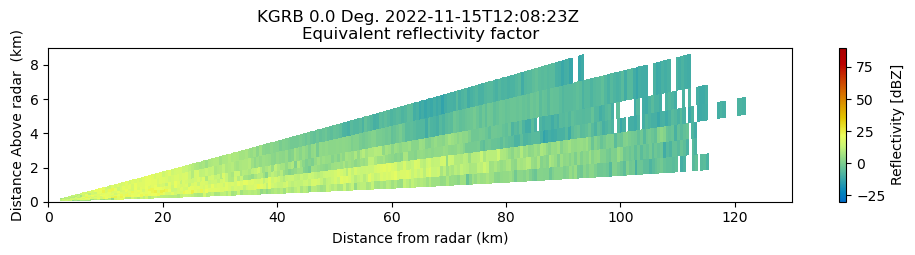

In [8]:
fig = plt.figure(figsize=(12,2))
cross_display_KGRB.plot('reflectivity', sweep=0, vmin=-30, vmax=90, 
             colorbar_label='Reflectivity [dBZ]')
plt.xlim(0,130)
plt.ylim(0,9)

(0.0, 9.0)

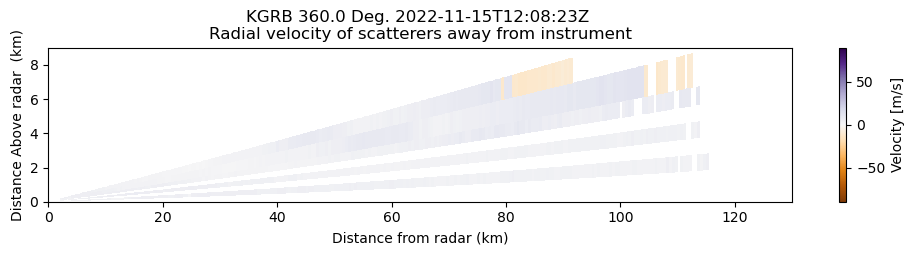

In [9]:
fig = plt.figure(figsize=(12,2))
cross_display_KGRB.plot('velocity', sweep=1, vmin=-90, vmax=90, 
             colorbar_label='Velocity [m/s]', cmap=plt.cm.PuOr)
plt.xlim(0,130)
plt.ylim(0,9)

---

Both cross sections don't give you much information to work with, I ran another data file to plot another cross section to see if we could gather more information from the plot.

Here we'll use, <b> Des Moines, IA, (KDMX) on November, 04, 2022 at 2357 UTC (5:57 CST) </b> during a storm outbreak.

In [10]:
data_KDMX = pyart.io.read_nexrad_archive('s3://noaa-nexrad-level2/2022/11/04/KDMX/KDMX20221104_235700_V06')

In [11]:
list(data_KDMX.fields)

['clutter_filter_power_removed',
 'reflectivity',
 'cross_correlation_ratio',
 'differential_phase',
 'velocity',
 'differential_reflectivity',
 'spectrum_width']

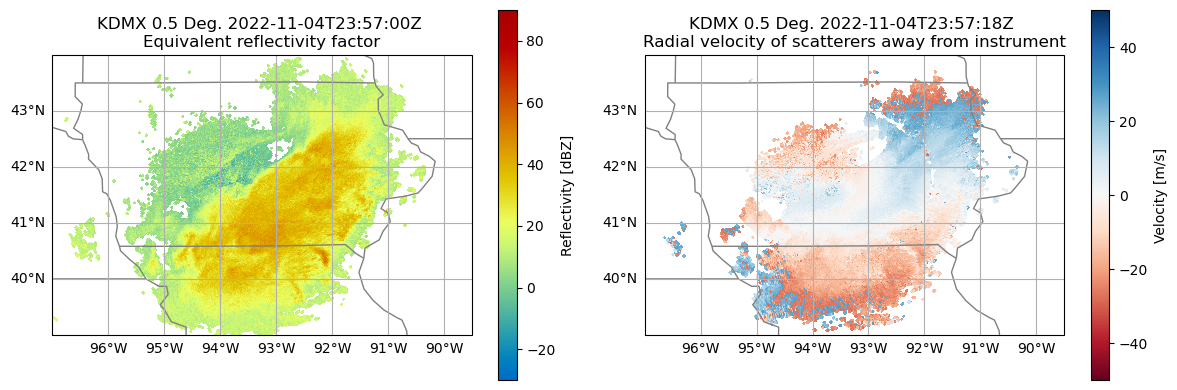

In [12]:
display_KDMX = pyart.graph.RadarMapDisplay(data_KDMX)

fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(121, projection=ccrs.PlateCarree())

display_KDMX.plot_ppi_map('reflectivity', sweep=0, ax=ax, vmin=-30, vmax=90,
                          min_lat=39, max_lat=44, min_lon=-89.5, max_lon=-97,
                          colorbar_label='Reflectivity [dBZ]')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
display_KDMX.plot_ppi_map('velocity', sweep=1, ax=ax, vmin=-50, vmax=50,
                          min_lat=39, max_lat=44, min_lon=-89.5, max_lon=-97,
                          colorbar_label='Velocity [m/s]', cmap=plt.cm.RdBu)

plt.tight_layout()
plt.show()

* Large section of reflectivity around 40 dBZ to 60 dBZ.
* Velocity has a lower resolution, though a particular feature at 41.5 N, 93.5 W could be of note as a possible location for inflow.

In [13]:
cross_section_KDMX = pyart.util.cross_section_ppi(data_KDMX, [0, 360]) #azimuth angles

In [14]:
cross_display_KDMX = pyart.graph.RadarDisplay(cross_section_KDMX)

(0.0, 10.0)

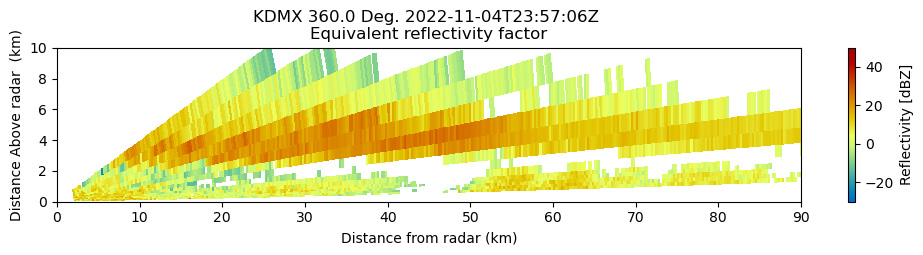

In [15]:
fig = plt.figure(figsize=(12,2))
cross_display_KDMX.plot('reflectivity', sweep=1, vmin=-30, vmax=50, 
             colorbar_label='Reflectivity [dBZ]')
plt.xlim(0,90)
plt.ylim(0,10)

(0.0, 10.0)

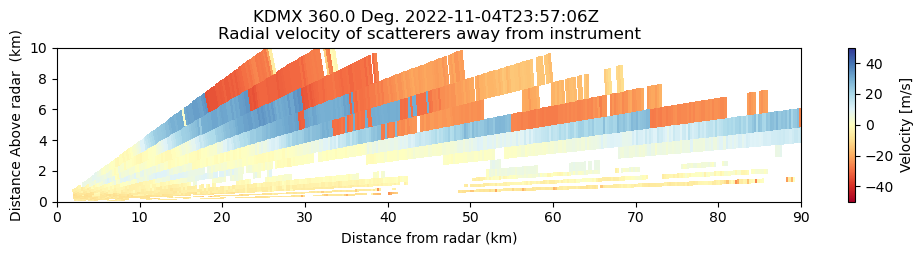

In [16]:
fig = plt.figure(figsize=(12,2))
cross_display_KDMX.plot('velocity', sweep=1, vmin=-50, vmax=50, 
             colorbar_label='Velocity [m/s]', cmap=plt.cm.RdYlBu)
plt.xlim(0,90)
plt.ylim(0,10)

The cross sections for Des Moines, IA looks a bit better, unfortunely, the resolution is lower using PPI. If you are interested in high-res plotting with RHI, you may use [this tutorial](https://arm-doe.github.io/pyart/examples/plotting/plot_rhi_two_panel.html), however you would have to use CF/Radial file format for your data.

---

## Plotting - Des Moines, IA

Cross sections can tell us about the evolution of a storm, I marked a few points that I found interesting and plotted <b> Des Moines, IA, (KDMX) on the same day, approx. two hours later at 0153 UTC (7:53 CST). </b> 

In [17]:
data_KDMX0153 = pyart.io.read_nexrad_archive('s3://noaa-nexrad-level2/2022/11/05/KDMX/KDMX20221105_015322_V06')

In [18]:
display_KDMX0153 = pyart.graph.RadarMapDisplay(data_KDMX0153)

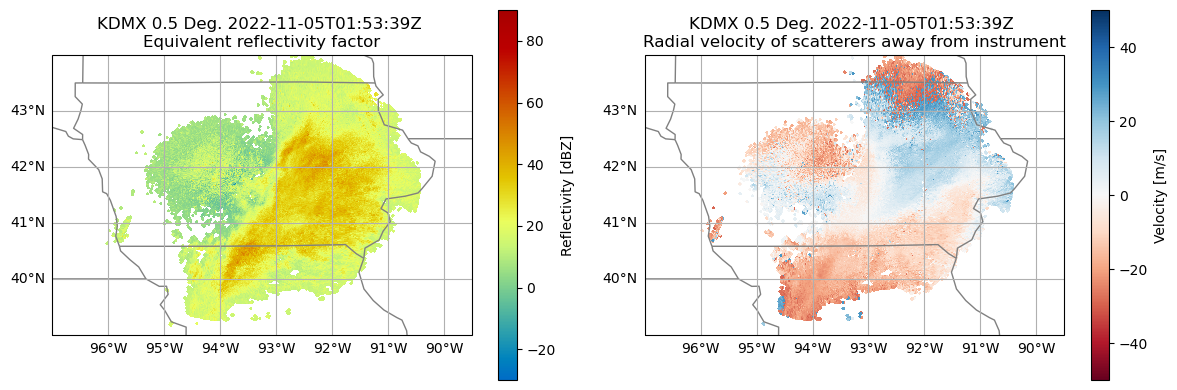

In [19]:
fig = plt.figure(figsize=(12, 4))
ax = plt.subplot(121, projection=ccrs.PlateCarree())

display_KDMX0153.plot_ppi_map('reflectivity', sweep=1, ax=ax, vmin=-30, vmax=90,
                    min_lat=39, max_lat=44, min_lon=-89.5, max_lon=-97,
                     colorbar_label='Reflectivity [dBZ]')

ax = plt.subplot(122, projection=ccrs.PlateCarree())
display_KDMX0153.plot_ppi_map('velocity', sweep=1, ax=ax, vmin=-50, vmax=50,
                    min_lat=39, max_lat=44, min_lon=-89.5, max_lon=-97,
                     colorbar_label='Velocity [m/s]', cmap=plt.cm.RdBu)

plt.tight_layout()
plt.show()

Plot using `pyart.graph.RadarDisplay` again:

Shows the field at a distance from the radar.

In [20]:
plot_display_KDMX0153 = pyart.graph.RadarDisplay(data_KDMX0153)

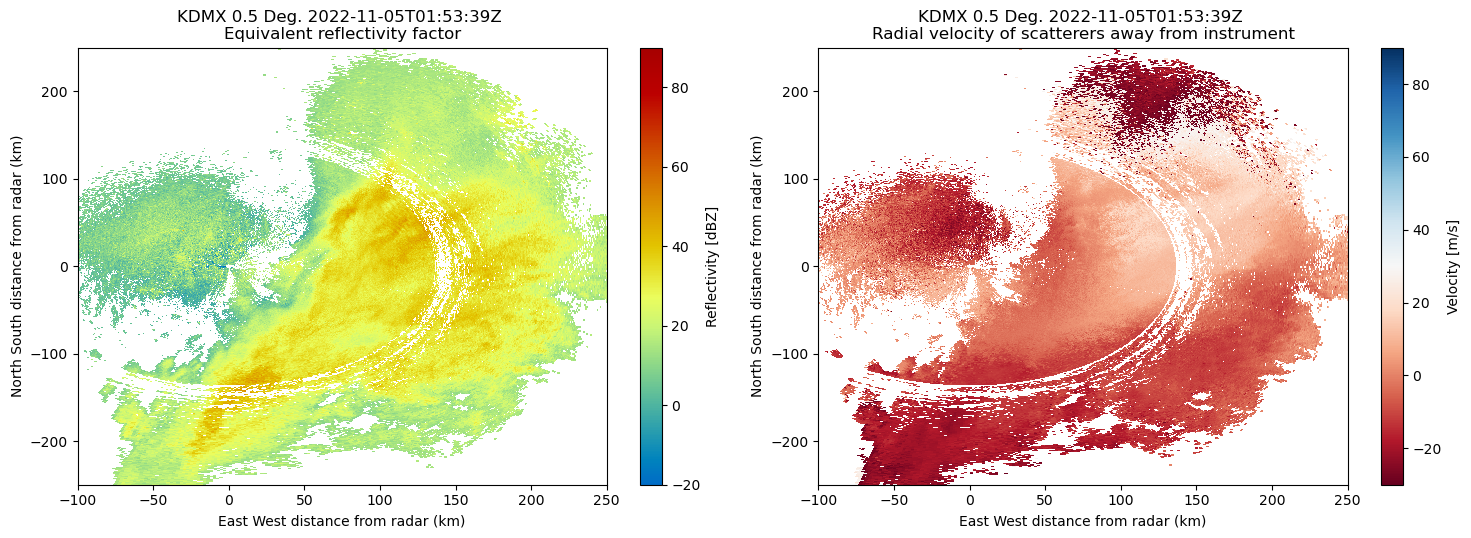

In [21]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(221)
plot_display_KDMX0153.plot('reflectivity', sweep=1, ax=ax, vmin=-20, vmax=90, 
             colorbar_label='Reflectivity [dBZ]')
plt.xlim(-100,250)
plt.ylim(-250,250)


ax = plt.subplot(222)
plot_display_KDMX0153.plot('velocity', sweep=1, ax=ax, vmin=-30, vmax=90, 
            colorbar_label='Velocity [m/s]', cmap=plt.cm.RdBu)
plt.xlim(-100,250)
plt.ylim(-250,250)

plt.tight_layout()
plt.show()

* Storm moving east.
* Same feature at 41.5 N, 93.5 W possible rotation?
* 42 N, 95 W, another feature in the velocity plot that may be rotation.

Py-ART is useful to find any feature in NEXRAD data, the downside is the low resolution. Using other formats for radar data could solve this issue, but it is still valuable for research that involves radar or satellite data.

In [22]:
cross_section_KDMX0153 = pyart.util.cross_section_ppi(data_KDMX0153, [0, 360]) 

In [23]:
cross_display_KDMX0153 = pyart.graph.RadarDisplay(cross_section_KDMX0153)

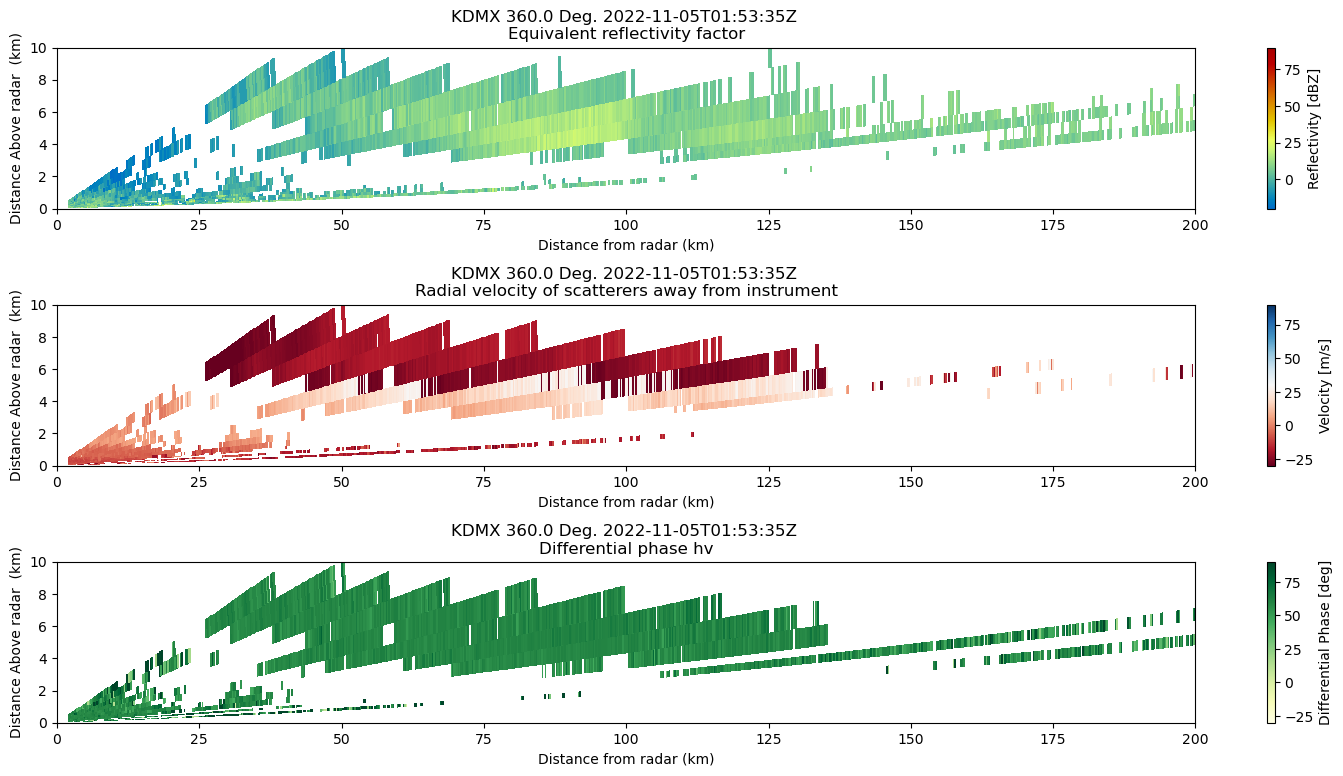

In [24]:
fig = plt.figure(figsize=(15, 10))
ax = plt.subplot(411)
cross_display_KDMX0153.plot('reflectivity', sweep=1, ax=ax, vmin=-20, vmax=90, 
             colorbar_label='Reflectivity [dBZ]')
plt.xlim(0,200)
plt.ylim(0,10)

ax = plt.subplot(412)
cross_display_KDMX0153.plot('velocity', sweep=1, ax=ax, vmin=-30, vmax=90, 
            colorbar_label='Velocity [m/s]', cmap=plt.cm.RdBu)
plt.xlim(0,200)
plt.ylim(0,10)

ax = plt.subplot(413)
cross_display_KDMX0153.plot('differential_phase', sweep=1, ax=ax, vmin=-30, vmax=90, 
            colorbar_label='Differential Phase [deg]', cmap=plt.cm.YlGn)
plt.xlim(0,200)
plt.ylim(0,10)

plt.tight_layout()
plt.show()

In cross sections, especially for real-life observations, it is common to have missing data. For my research, dealing with missing data (e.g wind profiles) are attained by dropsonde data and can help to fill in missing information.

---